In [1]:
import ase.io as ase_io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_rmse(a, b, perc=False):
    rmse = np.sqrt(np.mean(np.square(a - b)))
    if perc:
        return 100 * rmse / b.std(ddof=1)
    return rmse

In [3]:
# define colors

c0 = "#f18f01"
c1 = "#033f63"
c2 = "#95b46a"
c3 = "#ee4266"

In [4]:
# load rMD17 trajectories
mols = ["aspirin", "ethanol", "malonaldehyde", "naphthalene", "salicylic", "toluene"]
md17_frames = {}
for mol in mols:
    md17_frames[mol] = ase_io.read(f"../../data/rMD17/{mol}.xyz", ":")

In [5]:
rmd17_energy_err = []
for mol in mols:
    a = np.array([x.info["gomace_energy"] for x in md17_frames[mol]])
    a -= a[0]
    a = a[1:]
    b = np.array([x.info["castep_energy"] for x in md17_frames[mol]])
    b -= b[0]
    b = b[1:]
    print(mol)
    print(1e3 * get_rmse(a, b) / len(md17_frames[mol][0]))
    print()
    rmd17_energy_err.append(1e3 * get_rmse(a, b) / len(md17_frames[mol][0]))

aspirin
3.1732999452305313

ethanol
9.038162904109761

malonaldehyde
8.941516166202469

naphthalene
2.371764909988613

salicylic
1.976719193066957

toluene
8.008696829184608



In [6]:
rmd17_forces_err = []
for mol in mols:
    a = np.array([x.arrays["gomace_forces"] for x in md17_frames[mol]])
    # a -= a[0]
    b = np.array([x.arrays["castep_forces"] for x in md17_frames[mol]])
    # b -= b[0]
    print(mol)
    print(1e3 * get_rmse(a, b))
    print()
    rmd17_forces_err.append(1e3 * get_rmse(a, b))

aspirin
174.1681508358983

ethanol
268.74394015603406

malonaldehyde
225.62334381552097

naphthalene
59.97350863692866

salicylic
106.42643542252074

toluene
470.63044250236896



In [7]:
# change how the long molecule names are displayed
new_mols = mols.copy()
new_mols[2] = "malo."
new_mols[3] = "naphth."

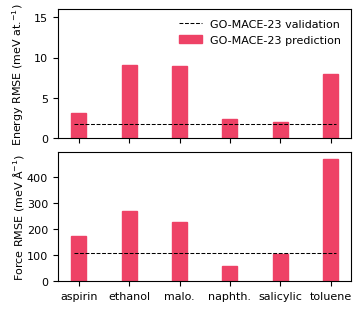

In [ ]:
fig = plt.figure(figsize=(3.5, 3.0), constrained_layout=True)

ax = fig.add_subplot(211)
ax.bar(
    np.arange(len(new_mols)),
    rmd17_energy_err,
    width=0.3,
    label="GO-MACE-23 prediction",
    color=c3,
    edgecolor=c3,
)

ax.plot([-0.1, 5.1], [1.8] * 2, "k--", lw=0.75, label="GO-MACE-23 validation")
ax.set_xticklabels(())
ax.tick_params(axis="both", labelsize=8)
ax.set_ylabel("Energy RMSE (meV at.$^{-1}$)", fontsize=8)
ax.legend(loc="upper right", fontsize=8, ncols=1, frameon=False)
ax.set_ylim(0, 16)

labelx = -0.11
ax.yaxis.set_label_coords(labelx, 0.5, transform=ax.transAxes)

ax = fig.add_subplot(212)
ax.bar(np.arange(len(new_mols)), rmd17_forces_err, width=0.3, color=c3, edgecolor=c3)

# GO-MACE-23 validation errors on the GO dataset
ax.plot([-0.1, 5.1], [106.9] * 2, "k--", lw=0.75)

ax.set_xticks(np.arange(len(new_mols)))
ax.set_xticklabels(new_mols)
ax.tick_params(axis="both", labelsize=8)
ax.set_ylabel("Force RMSE (meV $\mathrm{\AA}^{-1}$)", fontsize=8)
ax.yaxis.set_label_coords(labelx, 0.5, transform=ax.transAxes)

# fig.savefig("./fig2.svg", dpi=300)